In [1]:
from bs4 import BeautifulSoup
import nltk
from imdb import IMDb
import spacy
nlp = spacy.load('en_core_web_sm')

C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


1.	Compile a list of static links (permalinks) to individual user movie reviews from one particular website. This will be your working dataset for this assignment, as well as for assignments 7 and 8, which together will make up your semester project.     
-	It does not matter if you use a crawler or if you manually collect the links, but you will need at least 100 movie review links. Note that, as of this writing, the robots.txt file of IMDB.com allows the crawling of user reviews.  
-	Each link should be to a web page that has only one user review of only one movie, e.g., the user review permalinks on the IMDB site.  
-	Choose reviews of movies that are all in the same genre, e.g., sci-fi, mystery, romance, superhero, etc.    
-	Make sure your collection includes reviews of several movies in your chosen genre and that it includes a mix of negative and positive reviews.  

**I use Top 50 action movies on imdb**

In [2]:
#Top 50 action movies on imdb

action_movies_page="https://www.imdb.com/search/title/?genres=action&explore=title_type,genres&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=e0da8c98-35e8-4ebd-8e86-e7d39c92730c&pf_rd_r=JJR0ZYYNDRQTFBPXEF2T&pf_rd_s=center-2&pf_rd_t=15051&pf_rd_i=genre&ref_=ft_gnr_pr2_i_2"

I changed the methods when I read the instructions of the homework again.
We were asked to use beautiful soup.

In [3]:
#Apply beautiful soup html 'cleaning' methods to the reviews in the crawled movies
def action_movies(weblink):
    movie_list = dict()
    movie_list_clean = BeautifulSoup(requests.get(weblink).text, 'html.parser')
    for movie in movie_list_clean.find_all('a'):
        if movie.parent.name == "h3":
            movie_list[movie.text] = "https://www.imdb.com{0}reviews".format(movie["href"])
    return movie_list

In [4]:
import requests
def ReviewPermaLink(weblink):
    rev_list = BeautifulSoup(requests.get(weblink).text, 'html.parser')
    return ["https://www.imdb.com{0}".format(review["href"]) for review in rev_list.find_all('a', {"class": "title"})]

In [5]:
movies_dict = action_movies(action_movies_page)

In [6]:
len(movies_dict)

50

1.	Compile a list of static links (permalinks) to individual user movie reviews from one particular website.

In [7]:
#Obtain the permalinks
permalinks_Movie = [ReviewPermaLink(review) for movie, review in movies_dict.items()]

In [8]:
#Store the permalinks in the list generator
permalinks = []

In [9]:
for urls in permalinks_Movie:
    for url in urls:
        permalinks.append(url)

In [11]:
def Review_Permalink(url):
    review_clean = BeautifulSoup(requests.get(url).text, 'html.parser')
    return review_clean.find('div', {"class": "text show-more__control"}).text

In [12]:
#This disctionary stores main reviews
review_dict = dict()

Extracting the all the reviews 

In [13]:
perma_50 = permalinks[0:50]

In [14]:
for url in perma_50:  
    review_dict[url] = Review_Permalink(url)    

In [15]:
#Reviews and their movie ids
review_dict

{'https://www.imdb.com/review/rw7112003/': "Unexpectedly, Black Widow is not the main character in Black Widow. The plot is driven by Yelena, Natasha only happens to be her generic sidekick.Otherwise, it's an entertaining and forgettable episode.It features Marvel's trademarks like shallow characters, fast cuts in fight scenes, satirical accents (especially Harbour), an under-developed villain, the generic soundtrack and a CGI orgy for the climax.",
 'https://www.imdb.com/review/rw7108821/': 'As the perspective is everything in reviewing movies I should explain myself from MCU movies, I\'m an 80% MCU fan and 20% DCU fan, on the other hand, I\'m a 60% DC characters fan and 40% Marvel characters fan, and of course "Black Widow" isn\'t in my top 10 favorite Marvel characters list -which is doesn\'t really exist but if I did it someday I\'d never put Black Widow in it-\nSo you should know that I\'m not the number one Black Widow fan and so does the majority of people because she has never 

In [16]:
import os
import pandas as pd

In [17]:
# change working directory
os.chdir(r"C:\Users\olani\OneDrive\Documents\Data Science\SMU-Data Science\Natural Language Processing\Homeworks")
#"C:\Users\olani\OneDrive\Documents\Data Science\SMU-Data Science\Machine Learning 1\Olist_Dataset"

# get current working directory
os.getcwd()

'C:\\Users\\olani\\OneDrive\\Documents\\Data Science\\SMU-Data Science\\Natural Language Processing\\Homeworks'

In [48]:
review_dict_df=pd.DataFrame.from_dict(review_dict, orient='index')

In [19]:
#Saving my result

import pickle
pickle.dump(review_dict_df, open( "save.p", "wb" ) )

In [20]:
#review_dict_df1 = pickle.load( open( "save.p", "rb" ) )

In [21]:
#Save the file
filename = 'review_dict_df2'
outfile = open(filename,'wb')
pickle.dump(review_dict, outfile)
outfile.close()

In [22]:
#use this line to load the saved file.
infile = open(filename,'rb')
review_dict_ = pickle.load(infile)
infile.close()

# Homework 7  

**Separate the reviews**
- Separate out the reviews for text preprocessing.

In [23]:
reviews_50 = []
movies_review_50 = []
for k, v in review_dict_.items():
    reviews_50.append(v)
    movies_review_50.append(k)

In [24]:
reviews_50

["Unexpectedly, Black Widow is not the main character in Black Widow. The plot is driven by Yelena, Natasha only happens to be her generic sidekick.Otherwise, it's an entertaining and forgettable episode.It features Marvel's trademarks like shallow characters, fast cuts in fight scenes, satirical accents (especially Harbour), an under-developed villain, the generic soundtrack and a CGI orgy for the climax.",
 'As the perspective is everything in reviewing movies I should explain myself from MCU movies, I\'m an 80% MCU fan and 20% DCU fan, on the other hand, I\'m a 60% DC characters fan and 40% Marvel characters fan, and of course "Black Widow" isn\'t in my top 10 favorite Marvel characters list -which is doesn\'t really exist but if I did it someday I\'d never put Black Widow in it-\nSo you should know that I\'m not the number one Black Widow fan and so does the majority of people because she has never been introduced as a main character on the silver screen before.So if this was not a

In [25]:
import numpy as np
import re
from nltk.corpus import stopwords
default_wt = nltk.word_tokenize
#Here is a basic custom fucntion to extract only alphabet and word tokenize the documents.
def normalize_document(doc):
    # lowercase and remove special characters\whitespace
    doc = re.sub(r'[^a-zA-Z0-9\s]', ' ', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    #tokens = wpt.tokenize(doc)
    tokens = default_wt(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in set(stopwords.words('english'))]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return (doc)

In [26]:
import numpy as np
normalize_corpus = np.vectorize(normalize_document)

In [27]:
reviews_50_norm = normalize_corpus(reviews_50)

In [28]:
reviews_50_norm

array(['unexpectedly black widow main character black widow plot driven yelena natasha happens generic sidekick otherwise entertaining forgettable episode features marvel trademarks like shallow characters fast cuts fight scenes satirical accents especially harbour developed villain generic soundtrack cgi orgy climax',
       'perspective everything reviewing movies explain mcu movies 80 mcu fan 20 dcu fan hand 60 dc characters fan 40 marvel characters fan course black widow top 10 favorite marvel characters list really exist someday never put black widow know number one black widow fan majority people never introduced main character silver screen mcu movie watch itbut let put beside let talk cinema action lousy blame whoever put cate shortland project never made action movies first time blockbuster movie unfortunately failed give us single good action sequence scene scarlett johansson stunt double face fully clear much stupid things editing trying hide actresses laziness director lack

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(min_df=0., max_df=1., norm='l2', use_idf=True, smooth_idf=True)

In [30]:
tv_matrix = tv.fit_transform(reviews_50_norm)
tv_matrix = tv_matrix.toarray()

In [31]:
import pandas as pd
#Take a look at the vectorized text.
vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,10,100,14,15,1st,20,2000s,2021,25,40,...,written,wrong,wtf,yapping,yawn,year,years,yelena,yes,yet
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00
1,0.08,0.00,0.00,0.00,0.00,0.06,0.00,0.06,0.00,0.06,...,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.00
3,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.05,0.00
7,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [32]:
#I will be using cosine similarity because it is the most popular.

from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(tv_matrix, dense_output=True)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,0.114391,0.111606,0.080880,0.049628,0.045370,0.115188,0.052086,0.039138,0.009203,...,0.054131,0.009853,0.003401,0.000000,0.008093,0.017720,0.010146,0.048093,0.050781,0.083057
1,0.114391,1.000000,0.282167,0.205691,0.101078,0.161466,0.172684,0.135142,0.142428,0.098041,...,0.098188,0.021399,0.042557,0.021730,0.071330,0.065842,0.032309,0.062562,0.024511,0.194168
2,0.111606,0.282167,1.000000,0.238996,0.077999,0.187298,0.148692,0.165286,0.193239,0.168958,...,0.102442,0.007879,0.025703,0.008106,0.044046,0.047828,0.045031,0.061559,0.027613,0.156264
3,0.080880,0.205691,0.238996,1.000000,0.091524,0.160290,0.119166,0.104791,0.167490,0.072392,...,0.113417,0.020399,0.021609,0.005242,0.061894,0.025280,0.035009,0.062498,0.016418,0.158262
4,0.049628,0.101078,0.077999,0.091524,1.000000,0.046578,0.082684,0.040675,0.062569,0.038245,...,0.091136,0.010715,0.040930,0.000000,0.027313,0.063566,0.057603,0.005406,0.027238,0.106547
5,0.045370,0.161466,0.187298,0.160290,0.046578,1.000000,0.085989,0.089421,0.102831,0.062075,...,0.086997,0.013160,0.047438,0.039753,0.061405,0.033474,0.000000,0.049022,0.008389,0.057716
6,0.115188,0.172684,0.148692,0.119166,0.082684,0.085989,1.000000,0.086660,0.141576,0.028713,...,0.117167,0.008518,0.056427,0.000000,0.063881,0.022603,0.034641,0.027599,0.003687,0.074620
7,0.052086,0.135142,0.165286,0.104791,0.040675,0.089421,0.086660,1.000000,0.071395,0.198857,...,0.085282,0.005937,0.039585,0.031882,0.072645,0.057498,0.024674,0.022444,0.008473,0.085279
8,0.039138,0.142428,0.193239,0.167490,0.062569,0.102831,0.141576,0.071395,1.000000,0.096200,...,0.053133,0.048142,0.048847,0.020180,0.036841,0.037832,0.035968,0.037102,0.011387,0.053182
9,0.009203,0.098041,0.168958,0.072392,0.038245,0.062075,0.028713,0.198857,0.096200,1.000000,...,0.034921,0.017342,0.037846,0.000000,0.000000,0.019768,0.032162,0.000000,0.023379,0.020132


# 1  

In Python, select any one of the clustering methods covered in this course. Run it over the collection of reviews, and show at least two different ways of clustering the reviews, e.g., changing k in k-Means clustering or changing where you “cut” in Agnes or Diana.  


### Hierarchical clustering:
- The linkage method used here is Ward minimum variance criterion and it seeks to minimize the total within cluster variance.
- It finds the pair of cluster in the lower step to merge such that the merging results in the most minimum increase in total within-cluster variance. 

Reference: Dipanjan Sarkar (2019): Text Analytics with Python

In [33]:
#Below is about clustering the documents using Hierarchical clustering technique.
from scipy.cluster.hierarchy import dendrogram, linkage

In [34]:
Z = linkage(similarity_matrix, 'ward')

#### Linkage Matrix
- In this matrix:
    - Review_movie/Cluster represents either review index when it stands alone or the cluster label where multiple reviews occur in a cluster.
    - Distance is the cluster distance between the first two elements.
    - Cluster size is the total number of reviews that make up a cluster once the merge is complete for that respective step.
    e.g. second row has movie 2 and movie 18 in a cluster at this lowest step. They are also merged at the higher step but will be represented in the matrix by that cluster label instead of the list of reviews(i.e. documents) that make up that cluster.

In [35]:
pd.DataFrame(Z, columns=['Review_movie\Cluster 1', 'Review_Movie\Cluster 2', 'Distance', 'Cluster Size'], dtype='object')

,Review_movie\Cluster 1,Review_Movie\Cluster 2,Distance,Cluster Size
0,29.0,38.0,0.035514,2.0
1,2.0,18.0,1.017902,2.0
2,1.0,51.0,1.073557,3.0
3,7.0,9.0,1.166256,2.0
4,26.0,39.0,1.186063,2.0
5,3.0,52.0,1.197341,4.0
6,25.0,34.0,1.214826,2.0
7,30.0,44.0,1.215499,2.0
8,40.0,49.0,1.223111,2.0
9,12.0,17.0,1.227089,2.0


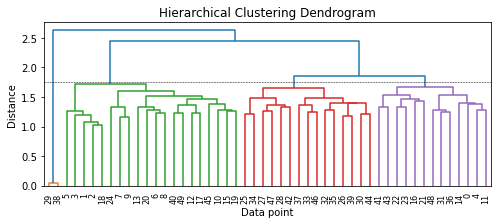

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.75, c='k', ls='--', lw=0.5)

#### Dendrogram  
- Broadly speaking the entire content of all the reviews can be placed in three clusters that are depcited by the colors in the dendrogram. These 4 colors/clusters agrees with the distance metric of < 1.75. 
- We will use the distance metric to display a list of the reviews that make up a cluster to better see the result of the clustering.

In [37]:
reviews_50_norm_series = pd.Series(reviews_50_norm)

In [38]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.75
cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
reviews_50_norm_cluster = pd.concat([reviews_50_norm_series, cluster_labels], axis=1)
reviews_50_norm_cluster

,0,ClusterLabel
0,unexpectedly black widow main character black ...,4
1,perspective everything reviewing movies explai...,2
2,black widow strong first half completely derai...,2
3,watched black widow last night sorry say disap...,2
4,problem latest marvel movies studios want get ...,4
5,movie demonstrates everything wrong big hollyw...,2
6,want start saying sort person likes ruin peopl...,2
7,sure going sure see film also wonder movie bor...,2
8,folks waste money watching either theaters dis...,2
9,boring weak scenario week action waste time su...,2


In [39]:
reviews_50_norm_cluster = reviews_50_norm_cluster.rename(columns={0: "Review", "Cluster Label": "Cluster label"})

In [40]:
reviews_50_norm_cluster

,Review,ClusterLabel
0,unexpectedly black widow main character black ...,4
1,perspective everything reviewing movies explai...,2
2,black widow strong first half completely derai...,2
3,watched black widow last night sorry say disap...,2
4,problem latest marvel movies studios want get ...,4
5,movie demonstrates everything wrong big hollyw...,2
6,want start saying sort person likes ruin peopl...,2
7,sure going sure see film also wonder movie bor...,2
8,folks waste money watching either theaters dis...,2
9,boring weak scenario week action waste time su...,2


In [41]:
#Let us sort the cluster table for better visuals
reviews_50_norm_cluster.sort_values(by=['ClusterLabel'], ascending = False)

,Review,ClusterLabel
0,unexpectedly black widow main character black ...,4
41,ever thought missing thor ragnarok answer admi...,4
23,actually enjoyed movie wait rest year mcu film...,4
22,think public suffered enough last year awful,4
21,know said move quit watching disney hire gross...,4
31,wanda vision amazing last fight episode falcon...,4
16,milk milk milk got milk point movie milk franc...,4
14,ok nothing special add much marvel universe,4
11,much potential much eagerness audiences part p...,4
36,ok watched three episodes must say impressed q...,4


**Comment**  
- The table above shows the reviews that make up each of the 4 clusters as well as their cluster labels.

- Most importantly:  
    - Reviews in cluster label 4 (e.g. 'charming cunning witty character loki turned') appear to be more positive than reviews in cluster label 2 which comprises mostly of negative leaning reviews (e.g., 'boring weak scenario week action waste time').  
    - Therefore the clustering algorithm did a good job and this threshold of cutting the dendrogram seems appropriate to me.

### Change the 'cut' threshold to 1.30

In [42]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.30
cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
reviews_50_norm_cluster_2 = pd.concat([reviews_50_norm_series, cluster_labels], axis=1)
reviews_50_norm_cluster_2

,0,ClusterLabel
0,unexpectedly black widow main character black ...,28
1,perspective everything reviewing movies explai...,2
2,black widow strong first half completely derai...,2
3,watched black widow last night sorry say disap...,2
4,problem latest marvel movies studios want get ...,27
5,movie demonstrates everything wrong big hollyw...,2
6,want start saying sort person likes ruin peopl...,5
7,sure going sure see film also wonder movie bor...,3
8,folks waste money watching either theaters dis...,5
9,boring weak scenario week action waste time su...,3


In [43]:
reviews_50_norm_cluster_2 = reviews_50_norm_cluster_2.rename(columns={0: "Review", "Cluster Label": "Cluster label"})

In [44]:
#Let us sort the cluster table for better visuals
reviews_50_norm_cluster_2.sort_values(by=['ClusterLabel'], ascending = False)

,Review,ClusterLabel
14,ok nothing special add much marvel universe,29
0,unexpectedly black widow main character black ...,28
11,much potential much eagerness audiences part p...,27
4,problem latest marvel movies studios want get ...,27
31,wanda vision amazing last fight episode falcon...,26
36,ok watched three episodes must say impressed q...,26
48,marvel run imo think shut first episode,26
21,know said move quit watching disney hire gross...,25
16,milk milk milk got milk point movie milk franc...,24
23,actually enjoyed movie wait rest year mcu film...,23


### Comparing the cut distance at 1.75 with 1.30  
- For distance metric 1.30:  
    - Compare cluster label 14 with cluster label 2 shows strong positive in cluster label 14 and strong negative in cluster label 2. 
    - The positive sentiments were broadly combined at distance metric 1.75.

In [45]:
#Save the file
filename1 = 'review_50_norm1'
outfile = open(filename,'wb')
pickle.dump(reviews_50_norm, outfile)
outfile.close()

In [46]:
#Save the file
filename = 'review_50_normcluster'
outfile = open(filename,'wb')
pickle.dump(reviews_50_norm_cluster, outfile)
outfile.close()

In [47]:
#use this line to load the saved file.
#infile = open(filename,'rb')
#reviews_50_norm_cluster_ = pickle.load(infile)
#infile.close()